<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


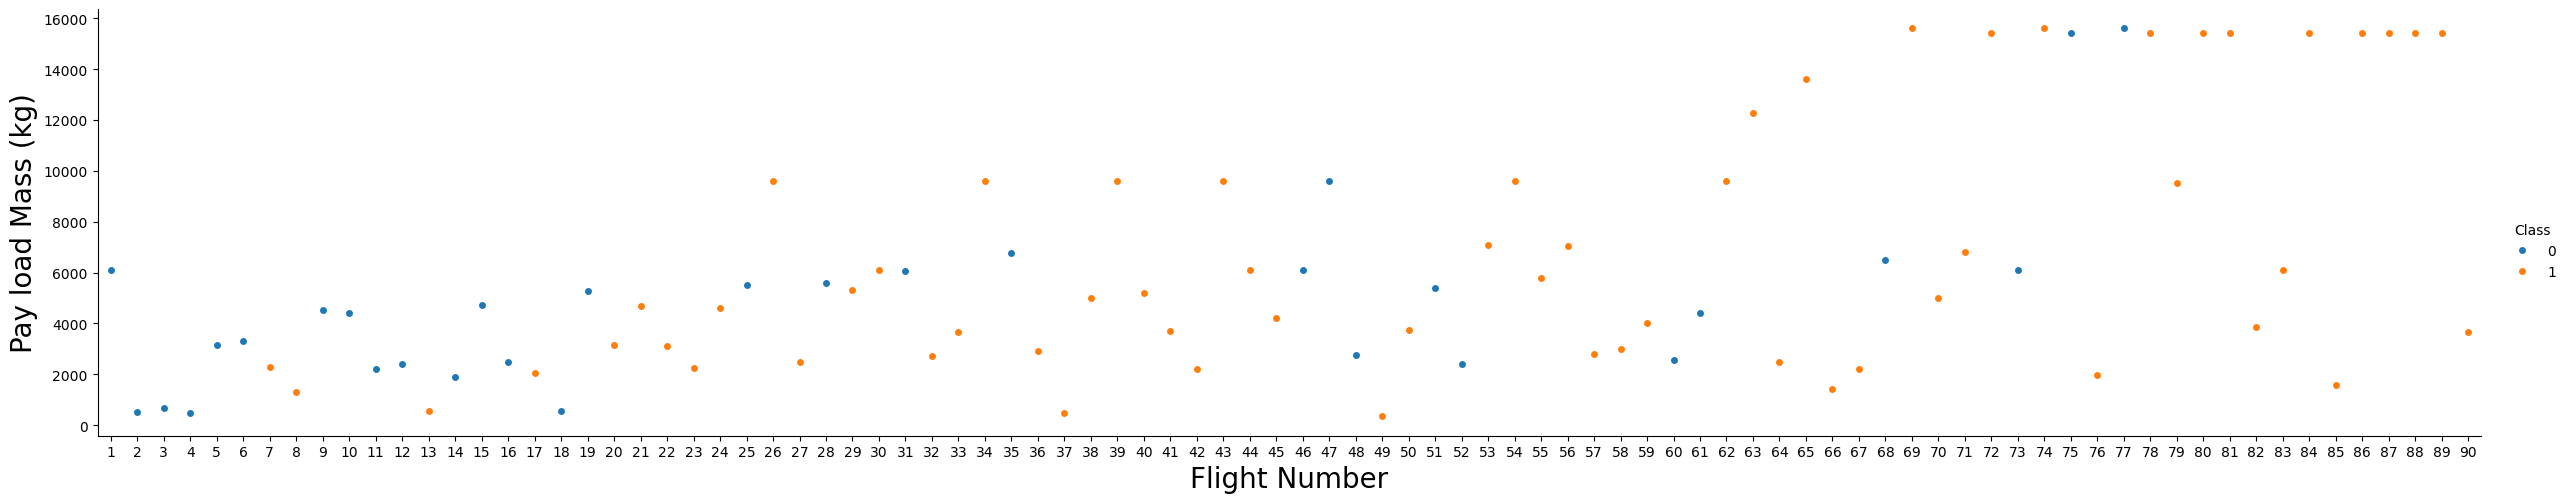

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


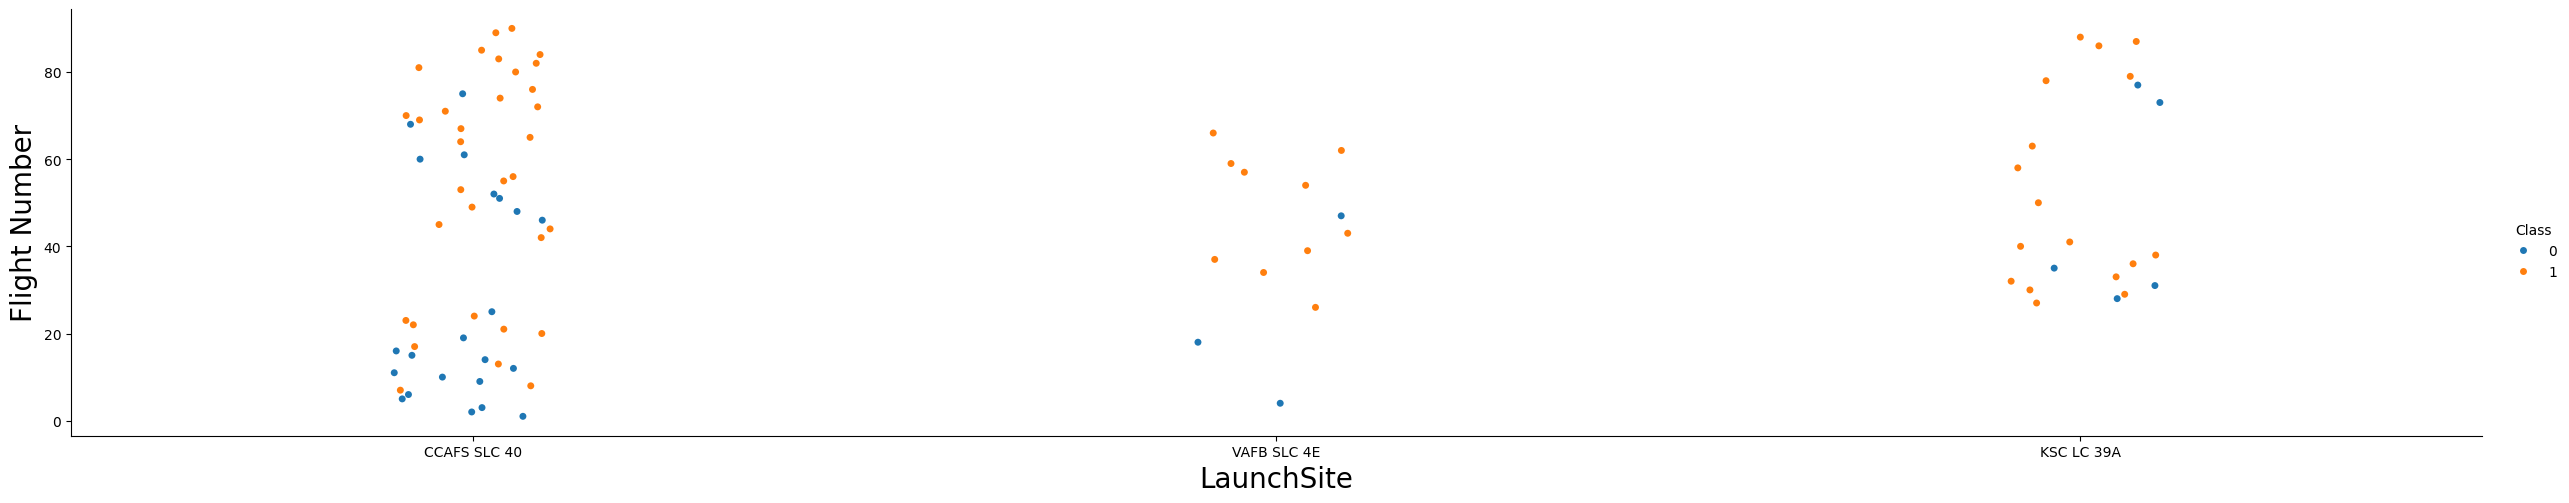

In [5]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="FlightNumber", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel("Flight Number",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


**Insights:**
1. Increasing Flight Numbers at Active Sites:
   - Certain launch sites, such as CCAFS SLC-40 and KSC LC-39A, have a wide distribution of flight numbers, indicating they have been used consistently over time.
   - Other sites may have a more limited range of flight numbers, suggesting they were only used for specific mission types or for a limited period.

2. Gaps in Launch Sites:
   - If certain launch sites show gaps in flight number sequences, it could indicate periods of inactivity due to maintenance, regulatory changes, or shifting launch strategies.

3. Site-Specific Trends:
   - If a site appears only for a certain range of flight numbers, it may indicate that it was either introduced at a later stage (e.g., KSC LC-39A) or phased out after early launches.

### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


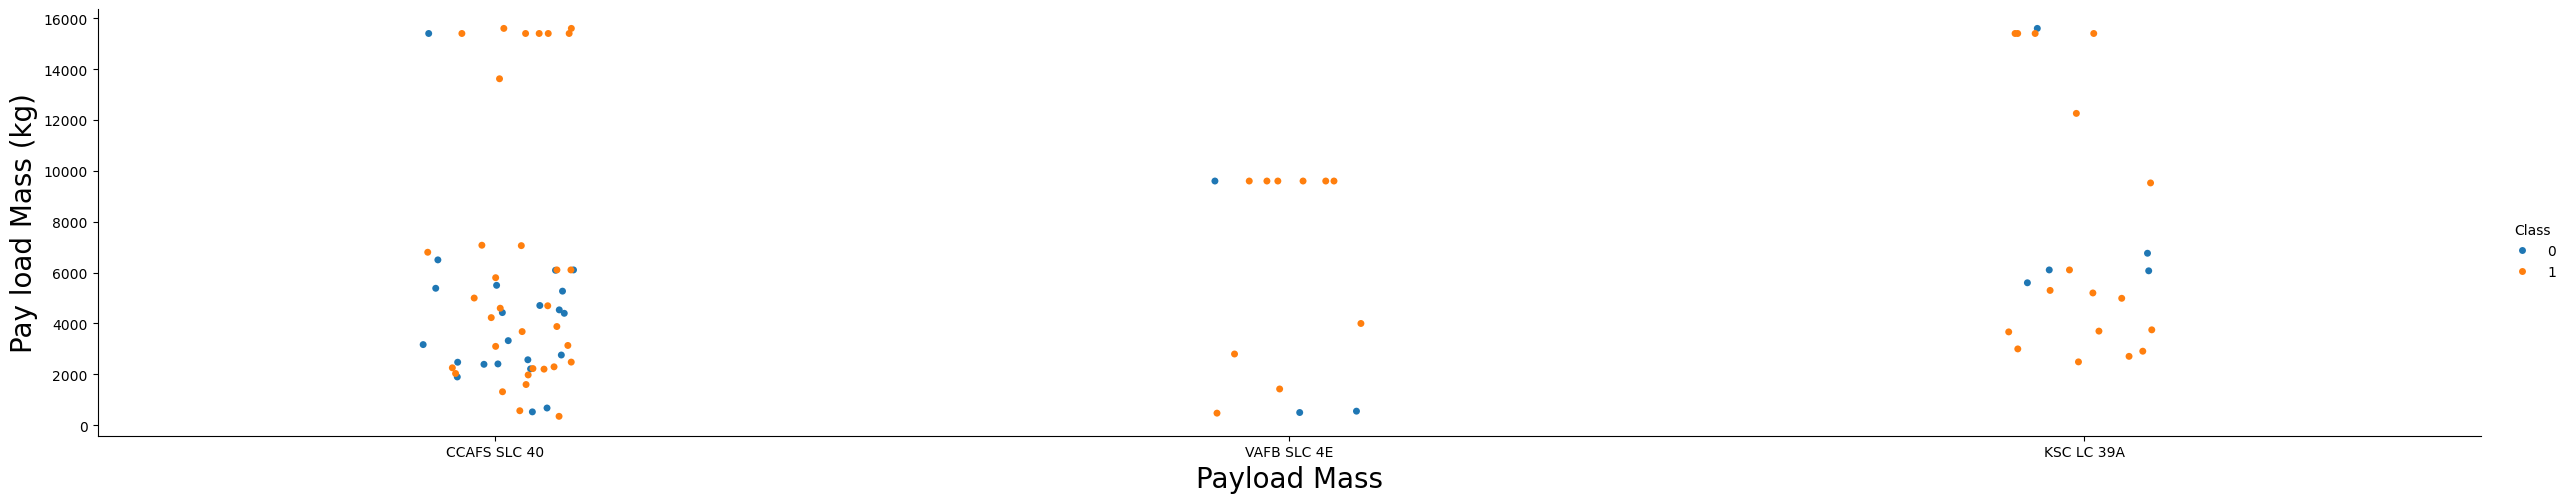

In [7]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


**Insights:**

1. Certain Sites Handle Heavier Payloads More Frequently:
    - If a specific launch site (e.g., KSC LC-39A) consistently handles heavier payloads, it may indicate that it is equipped with better infrastructure for high-mass launches, such as crewed missions or deep-space payloads.
    - Conversely, sites like CCAFS SLC-40 may launch a broader range of payloads, including smaller satellites.

2. Limited Payload Ranges at Certain Sites:
    - If a launch site primarily supports lower payload masses, it may be optimized for lightweight satellite launches rather than heavy-lift missions.
    - For example, VAFB SLC-4E may have a narrower payload mass distribution due to specific mission types such as polar or sun-synchronous orbit deployments.

3. Trends in Payload Capacity Over Time:
    - If later launches show heavier payloads at a specific site, this could indicate improvements in rocket technology (e.g., Falcon Heavy) or increasing demand for higher-mass missions.
  
4. Outliers and Special Missions:
    - Any extreme payload masses observed at a particular site could correspond to unique missions (e.g., Falcon Heavy launches carrying large payloads to geostationary or deep-space orbits).
    - Identifying these outliers can help determine which sites are used for specialized missions.

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


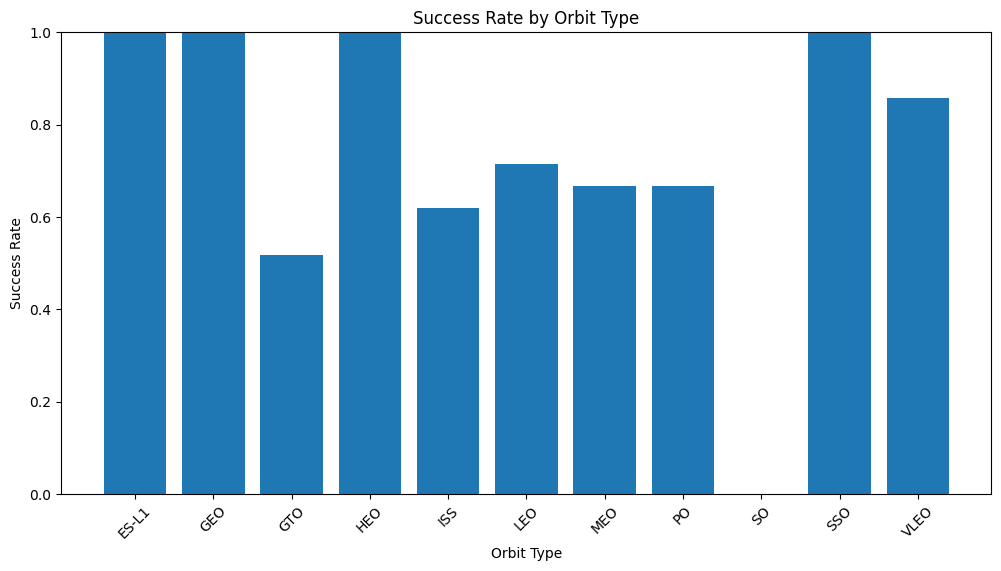

In [10]:
# HINT use groupby method on Orbit column and get the mean of Class column
success_rate = df.groupby("Orbit")["Class"].mean()

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(success_rate.index, success_rate.values)
plt.xlabel("Orbit Type")
plt.ylabel("Success Rate")
plt.title("Success Rate by Orbit Type")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Success rate ranges from 0 to 1

# Display the plot
plt.show()

Analyze the plotted bar chart to identify which orbits have the highest success rates.


**Insights:**

1. Higher Success Rates for Certain Orbits:
    - If Low Earth Orbit (LEO) and Geostationary Transfer Orbit (GTO) show higher success rates, it may be due to the fact that these are the most frequently attempted orbits, allowing SpaceX to refine their launch techniques over time.
    - These orbits are commonly used for satellite deployments and cargo missions to the ISS, which are well within Falcon 9’s capabilities.

2. Lower Success Rates for Challenging Orbits:
    - If certain orbit types (e.g., Polar, Heliocentric, or Interplanetary Orbits) show lower success rates, it may indicate that these missions are inherently more challenging due to factors such as:
        - Longer travel distances.
        - Higher velocity requirements.
        - More complex mission parameters (e.g., Mars or Moon missions).

3. Trends Over Time:
    - If success rates for specific orbits have improved over time, it suggests advancements in SpaceX’s technology and experience with particular mission types.
    - This could indicate increased confidence in attempting more complex missions in the future.

4. Impact on Future Mission Planning:
    - If some orbit types show consistently low success rates, SpaceX might focus on further improving technology and mission planning to mitigate risks.
    - Alternatively, higher success rates in frequently used orbits (e.g., LEO and GTO) may encourage more commercial satellite launches in these regions.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


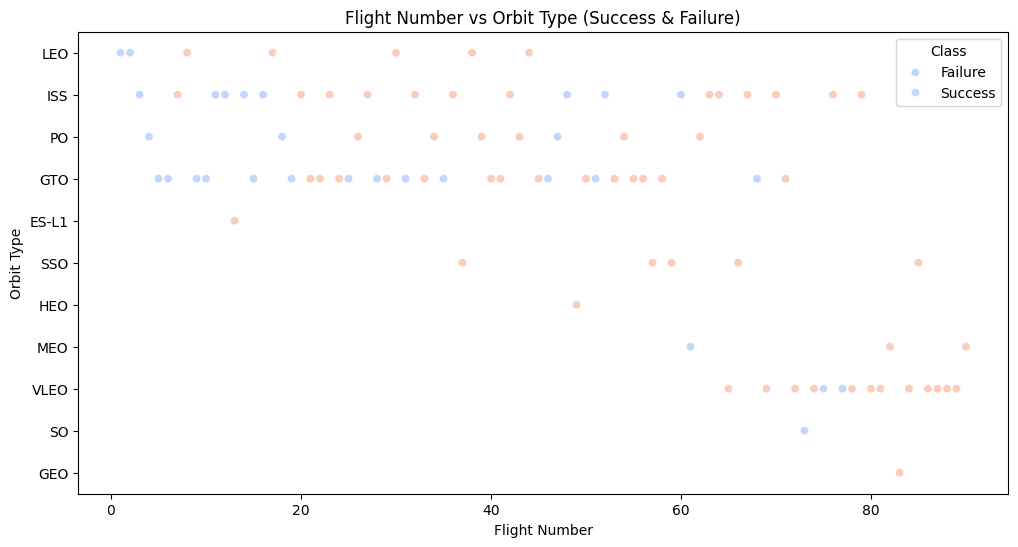

In [12]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="FlightNumber", y="Orbit", hue="Class", palette="coolwarm", alpha=0.7)

# Labels and title
plt.xlabel("Flight Number")
plt.ylabel("Orbit Type")
plt.title("Flight Number vs Orbit Type (Success & Failure)")
plt.legend(title="Class", labels=["Failure", "Success"])

# Display the plot
plt.show()

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


**Insights:**

1. Early Missions Focused on Specific Orbit Types:
    - If lower flight numbers are concentrated in orbits like Low Earth Orbit (LEO) or Geostationary Transfer Orbit (GTO), it suggests that SpaceX initially prioritized these relatively simpler and well-established mission types.
    - These orbits are commonly used for satellite launches and cargo missions to the International Space Station (ISS).

2. Increasing Variety of Orbits Over Time:
    - If later flight numbers show a wider spread across multiple orbit types, it indicates that SpaceX expanded its capabilities to support a greater diversity of missions.
    - The introduction of Polar, Sun-Synchronous, and Interplanetary orbits in later flights would suggest increased confidence in handling complex mission requirements.

3. Flight Experience vs. Risk-Taking:
    - If missions targeting higher-risk orbits (e.g., interplanetary missions) appear only at later flight numbers, it suggests that SpaceX strategically waited until they had sufficient technical expertise and proven reliability before attempting more difficult launches.
    - A lack of failed missions in certain orbit types at higher flight numbers would further confirm SpaceX's improved mission planning.

4. Potential Clusters for Specific Missions:
    - If there are clusters of flight numbers for particular orbit types, it may indicate:
        - Dedicated launch programs for specific customers (e.g., Starlink for LEO).
        - Batch missions of similar type grouped together.
        - Changes in SpaceX’s business strategy over time (e.g., shifting focus to deep-space missions).

### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


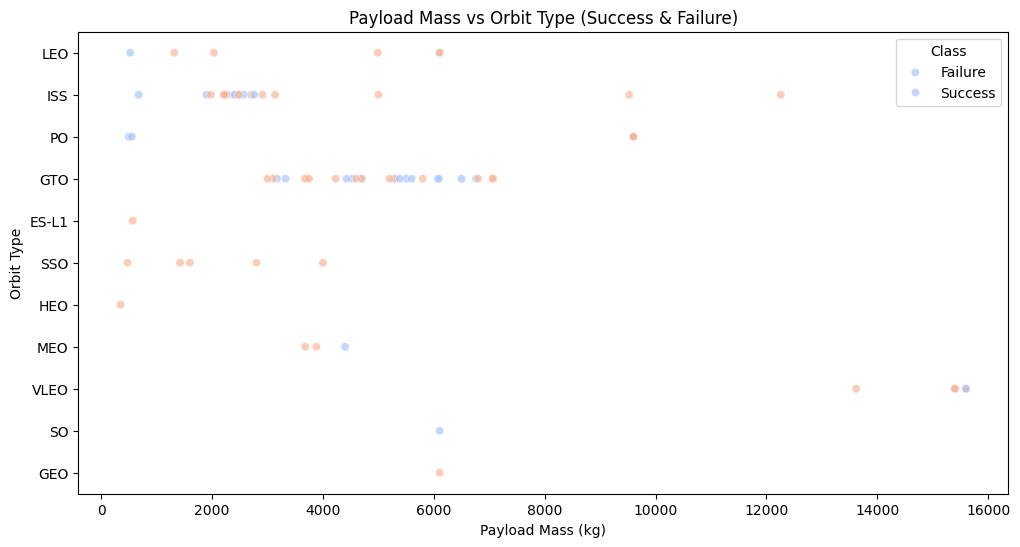

In [14]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="PayloadMass", y="Orbit", hue="Class", palette="coolwarm", alpha=0.7)

# Labels and title
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit Type")
plt.title("Payload Mass vs Orbit Type (Success & Failure)")
plt.legend(title="Class", labels=["Failure", "Success"])

# Display the plot
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


**Insights:**

1. Lower Payload Mass for LEO and Sun-Synchronous Orbits (SSO):
    - If Low Earth Orbit (LEO) and Sun-Synchronous Orbit (SSO) show a wide range of payload masses, but mostly on the lower end, it indicates that these orbits are commonly used for lighter payloads, such as small satellites and Starlink missions.
    - LEO missions are more frequent because they require less fuel and lower launch energy.

2. Higher Payload Mass for GTO and Beyond:
    - If Geostationary Transfer Orbit (GTO), Polar, and Interplanetary orbits show heavier payloads, it suggests that missions to these orbits typically require more powerful rockets (e.g., Falcon Heavy for deep-space missions).
    - GTO is often used for communication satellites, which tend to be heavy due to the need for on-board propulsion systems.

3. Payload Constraints for Certain Orbits:
    - If some orbit types show a narrow range of payload masses, it may indicate technical or cost constraints that prevent heavier payloads from being sent to those orbits.
    - For example, Polar and Sun-Synchronous Orbits (SSO) might only accommodate specific satellite sizes due to their altitude and energy requirements.

4. Outliers Indicating Special Missions:
    - If a few points appear at extremely high payload masses, these could correspond to unique missions such as Falcon Heavy launches carrying interplanetary probes or large commercial payloads.
    - Notable outliers may include missions like Tesla Roadster to Heliocentric Orbit or deep-space exploration missions.

5. Correlation Between Payload Mass and Orbit Difficulty:
    - Generally, heavier payloads are associated with higher-energy orbits, meaning more fuel and advanced rocket technology are required.
    - If there is a trend where lighter payloads are consistently associated with specific orbits, it can help SpaceX optimize its launch strategies for efficiency.

### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [15]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


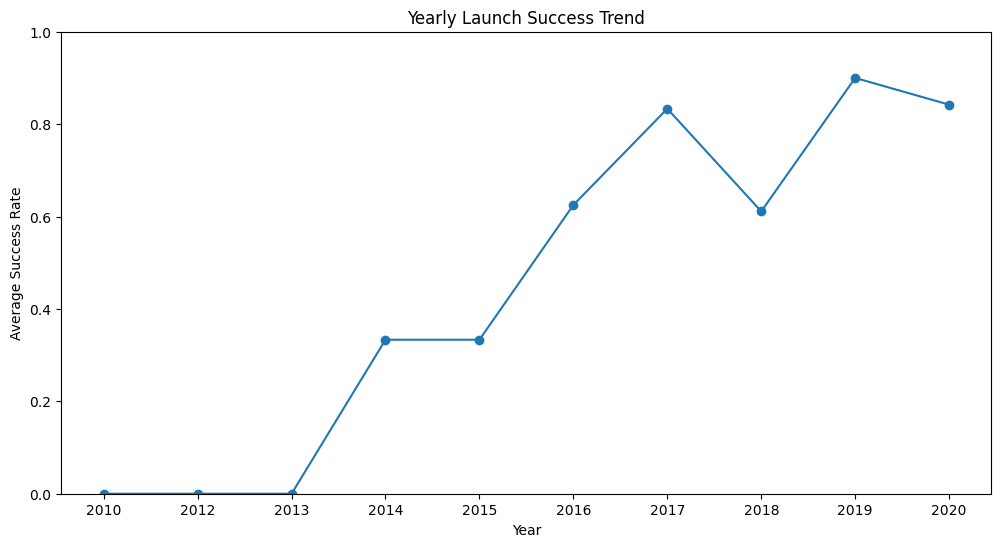

In [17]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
yearly_success_rate = df.groupby("Date")["Class"].mean()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_success_rate.index, yearly_success_rate.values, marker='o', linestyle='-')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average Success Rate")
plt.title("Yearly Launch Success Trend")
plt.ylim(0, 1)  # Success rate ranges from 0 to 1

# Display the plot
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


**Insights:**

1. Steady Growth in Successful Launches Over Time:
    - If the success rate increases year after year, it indicates continuous improvement in SpaceX’s launch technology, mission planning, and operational efficiency.
    - A rising trend suggests that SpaceX has optimized its rocket reusability and reliability over time.

2. Early Years Had a Lower Success Rate:
    - If the earlier years show fewer successful launches, it is likely due to experimental and developmental stages of Falcon 9 technology.
    - Initial failures were expected as SpaceX refined its landing techniques and propulsion systems.

3. Significant Jumps Indicating Breakthroughs:
    - If there are sharp increases in success rate in certain years, these could be linked to:
        - The introduction of Falcon 9 Block 5, a more reliable and reusable rocket version.
        - The first successful booster landings and subsequent reusability of rockets.
        - Increased demand for commercial satellite launches (e.g., Starlink program).

4. Identifying Periods of Setbacks or Challenges:
    - If there are dips or stagnation in success rates, these may be caused by:
        - Technical failures (e.g., Falcon 9 explosion incidents).
        - Mission complexity increases, such as interplanetary or crewed missions.
        - Regulatory or economic factors affecting launch schedules.

5. Acceleration in Recent Years:
    - If there is a steep upward trend in the last few years, it suggests that:
        - SpaceX has achieved higher launch frequency and reliability.
        - The Starlink program has significantly contributed to the increasing number of launches.
        - Falcon 9’s reusability has allowed for cost-effective and frequent launches.

## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [18]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [20]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [21]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')

# Verify the data types
features_one_hot.dtypes.head()

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
dtype: object

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
